## 1. 讀入套件

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

## 2. 讀入手寫辨識圖片資料並做處理

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 3. 匯入之前fashion資料集所做的CNN模型

In [6]:
fashion_model = tf.keras.models.load_model('fashion_model.h5')

In [7]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

## 4. 進行Transfer Learning

In [8]:
for layer in fashion_model.layers[-1:]:
    layer.trainible = False
    print(layer, layer.trainible)

<tensorflow.python.keras.layers.core.Dense object at 0x00000174412DD108> False


In [9]:
fashion_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = fashion_model.fit(x_train, y_train, batch_size=100, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
600/600 [==============================] - 10s 17ms/step - loss: 0.4483 - accuracy: 0.8816 - val_loss: 0.0858 - val_accuracy: 0.9720
Epoch 2/20
600/600 [==============================] - 10s 17ms/step - loss: 0.0911 - accuracy: 0.9728 - val_loss: 0.0486 - val_accuracy: 0.9840
Epoch 3/20
600/600 [==============================] - 10s 17ms/step - loss: 0.0557 - accuracy: 0.9827 - val_loss: 0.0433 - val_accuracy: 0.9868
Epoch 4/20
600/600 [==============================] - 10s 17ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0349 - val_accuracy: 0.9881
Epoch 5/20
600/600 [==============================] - 10s 17ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0427 - val_accuracy: 0.9871
Epoch 6/20
600/600 [==============================] - 10s 17ms/step - loss: 0.0273 - accuracy: 0.9910 - val_loss: 0.0322 - val_accuracy: 0.9899
Epoch 7/20
600/600 [==============================] - 10s 17ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.0408 - val_accuracy:

## 5.結果

(0.9, 1.0)

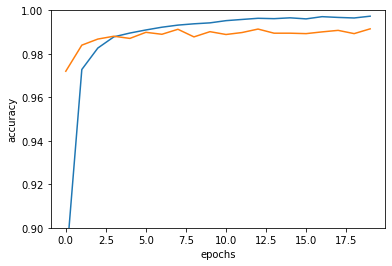

In [11]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0.9, 1)

(0.0, 0.3)

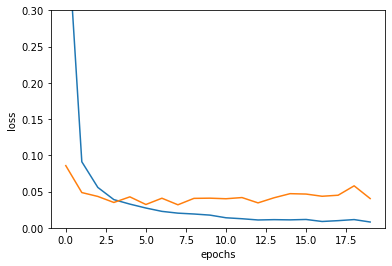

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.3)